09.02.2025 Checkpoint №1

Ссылка на датасет https://www.kaggle.com/code/dheerov/stress-detection/notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Vlad\Downloads\dz\данные для курсовой\data_stress.csv")
df.head() #вывод первых строк

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Описание колонок
1) snoring range - диапазон храпа; уровень шума в децибелах; количественная, непрерывная; числовой (float).
2) respiration rate - частота дыхания; количество вдохов в минуту; количественная, непрерывная; числовой (float).
3) body temperature - температура тела; температура  в градусах по F; количественная, непрерывная; числовой (float).
4) limb movement - движение конечностей; количество движений в час; количественная, непрерывная; числовой (float).
5) blood oxygen - кислород в крови; Доля насыщенного кислорода в крови/сатурация(% насыщения O₂); количественная, непрерывная; числовой (float).
7) eye movement - движение глаз; количество движений глаз в час; количественная, непрерывная; числовой (float).
8) hours of sleep - время сна; общее количество часов сна; количественная, непрерывная; числовой (float).
9) heart rate - частота сердечных сокращений; удары в минуту; количественная, непрерывная; числовой (float).
10) stress Levels - уровень стресса; Условная шкала стресса (от 0 до 4), где категория (0 – низкий, 4 – высокий); целое, категориальная(int).

In [4]:
# Убираем лишние пробелы в названии колонок для удобства
df.columns = df.columns.str.strip()

In [5]:
#1 Общая информация (колонки, типы данных, пропущенные значения)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring range     630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  614 non-null    float64
 3   limb movement     618 non-null    float64
 4   blood oxygen      626 non-null    float64
 5   eye movement      612 non-null    float64
 6   hours of sleep    619 non-null    float64
 7   heart rate        606 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [16]:
#2 Статистическое описание числовых колонок
df.describe() 

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.916314,93.462098,11.928098,91.047616,88.996540,3.831765,64.811762,2.000000
std,19.372833,4.336242,6.746181,4.954834,4.876256,13.287444,3.312105,11.053249,1.415337
min,45.000000,16.000000,85.000000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.660000,8.564000,88.500000,81.410000,0.516000,56.450000,1.000000
50%,70.000000,21.016000,93.080000,11.048000,91.000000,90.080000,3.608000,62.540000,2.000000
75%,91.250000,25.064000,95.532000,15.830000,94.250000,98.710000,6.548000,72.260000,3.000000
max,100.000000,48.560000,166.230000,46.800000,154.300000,185.360000,20.220000,158.650000,4.000000


In [7]:
#3 Количество пропущенных значений и процент пропущенных значений
print(df.isnull().sum())
print(df.isnull().mean() * 100)

snoring range        0
respiration rate     0
body temperature    16
limb movement       12
blood oxygen         4
eye movement        18
hours of sleep      11
heart rate          24
Stress Levels        0
dtype: int64
snoring range       0.000000
respiration rate    0.000000
body temperature    2.539683
limb movement       1.904762
blood oxygen        0.634921
eye movement        2.857143
hours of sleep      1.746032
heart rate          3.809524
Stress Levels       0.000000
dtype: float64


15.03.2025 Checkpoint №2

In [8]:
#4 Дубликаты
duplicates_count = df.duplicated().sum()
print(f"Количество  дубликатов строк: {duplicates_count}")

Количество  дубликатов строк: 0


In [10]:
#5 Количество признаков
print(df['Stress Levels'].value_counts())

Stress Levels
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64


In [ ]:
#6 Работа с пропусками

-В ходе анализа выявлены пропущенные значения в некоторых признаках. Их доля относительно общего объема данных:
Признак	            Пропуски (шт.)	Пропуски (%)
body temperature	16	            2.54%
limb movement	    12	            1.90%
blood oxygen	    4	            0.63%
eye movement	    18	            2.86%
hours of sleep	    11	            1.75%
heart rate	        24	            3.81%

-Возможные причины появления пропусков:
Неполные данные измерений (например, неполное медицинское обследование)
Ошибки работы оборудования или датчиков
Проблемы при сборе и переносе данных в таблицу(человеческий фактор)

-Выбор способа заполнения:
Для заполнения пропусков выбран метод заполнения медианой, так как медиана устойчива к выбросам. В физиологических показателях (температура, пульс) 
нормальное распределение может нарушаться, а медиана лучше описывает центральную тенденцию.

In [12]:
for col in ['body temperature', 'limb movement', 'blood oxygen', 'eye movement', 'hours of sleep', 'heart rate']:
    df[col] = df[col].fillna(df[col].median())

In [13]:
# пропуски после обработки
df.isnull().sum() 

snoring range       0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
hours of sleep      0
heart rate          0
Stress Levels       0
dtype: int64

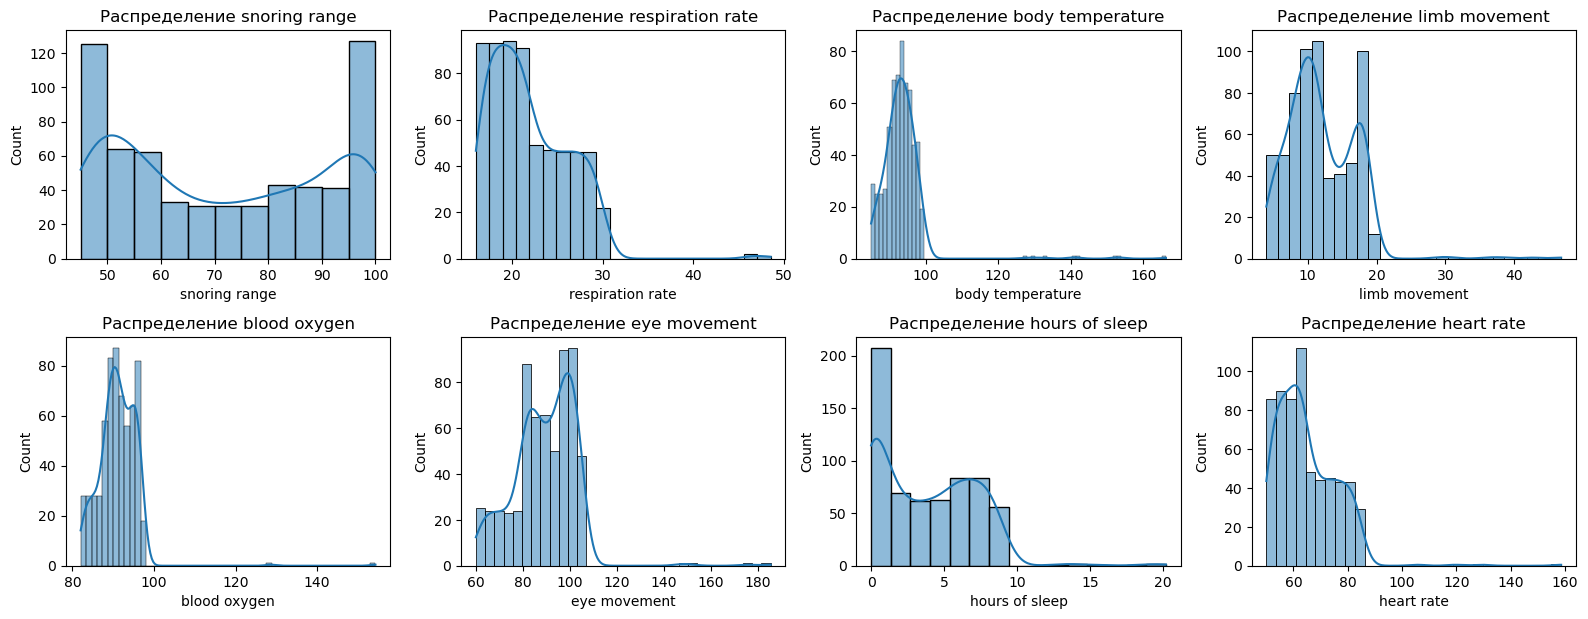

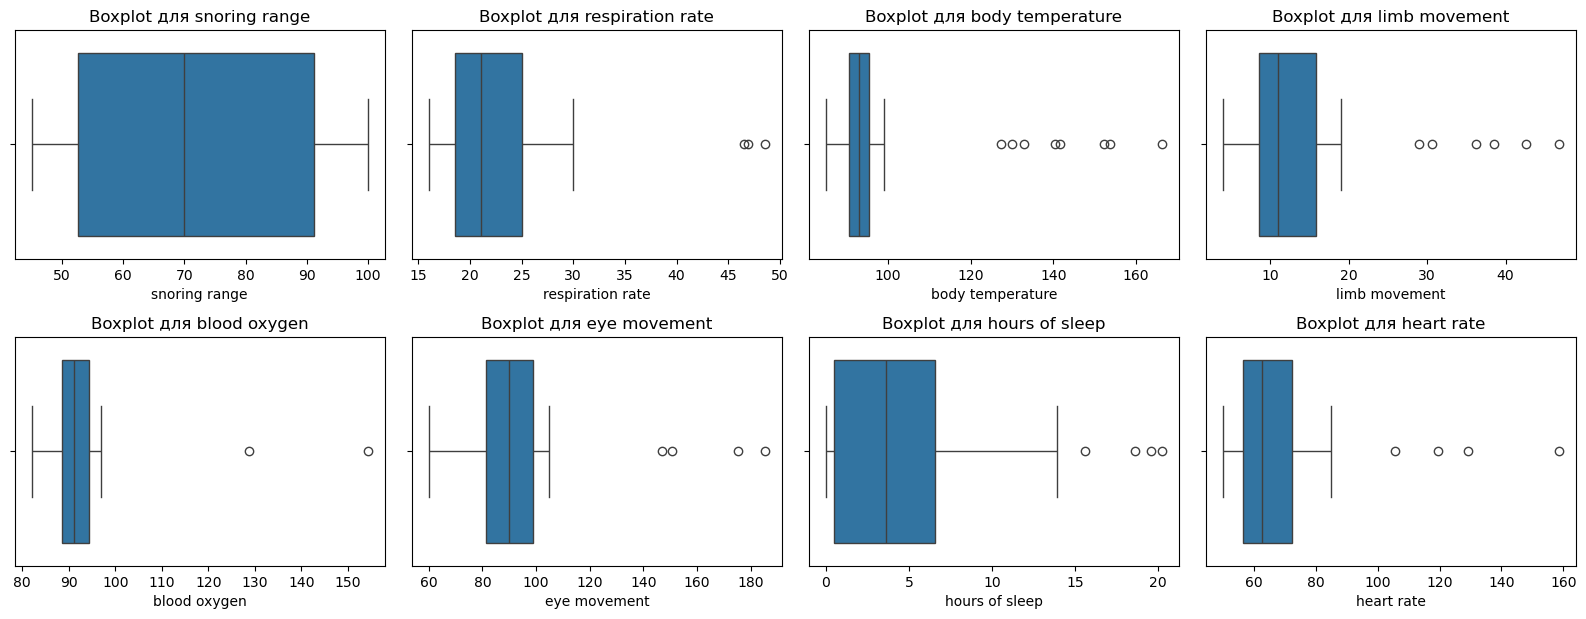

In [14]:
# 7 Работа с выбросами
numeric_cols = ['snoring range', 'respiration rate', 'body temperature', 'limb movement', 
                'blood oxygen', 'eye movement', 'hours of sleep', 'heart rate']

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')

plt.tight_layout()
plt.show()

In [ ]:
Что видно:
-body temperature (температура)
Видно несколько явных выбросов далеко за 100°C.
Это точно не физиологично, такие значения в медицине невозможны. Значит, это ошибки измерений или ошибки при вводе данных.

-hours of sleep (часы сна)
Большинство значений лежат в диапазоне 0-10 часов.
Есть несколько случаев с почти 20 часами сна — это уже настораживает, скорее всего тоже выбросы или особенности группы.

-blood oxygen (кислород в крови)
Тут есть значения, уходящие за 120%, это странно.
Нормальный диапазон для человека — 95-100%, выше 100% в реальных данных быть не должно.

-respiration rate, snoring range, limb movement, heart rate
У всех этих признаков есть выбросы, но они выглядят не как ошибки, а скорее как крайние физиологические случаи (индивидуальные особенности).

В итоге что делаем:
body temperature	Обрезать выбросы по IQR и заменить медианой
hours of sleep	    Аналогично- обрезать по IQR
blood oxygen	    Все, что выше 100%, приравнять к 100% (медицинская логика)
Остальные	        Пока оставить как есть, но можно зафиксировать в выводах, что есть крайние случаи

In [15]:
# до обработки выбросов
print(df[['body temperature', 'hours of sleep', 'blood oxygen']].describe())

       body temperature  hours of sleep  blood oxygen
count        630.000000      630.000000    630.000000
mean          93.462098        3.831765     91.047616
std            6.746181        3.312105      4.876256
min           85.000000        0.000000     82.000000
25%           90.660000        0.516000     88.500000
50%           93.080000        3.608000     91.000000
75%           95.532000        6.548000     94.250000
max          166.230000       20.220000    154.300000


In [17]:
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df


columns_with_outliers = ['body temperature', 'hours of sleep']
for col in columns_with_outliers:
    df = clip_outliers_iqr(df, col)


In [18]:
df['blood oxygen'] = df['blood oxygen'].clip(upper=100)

In [19]:
# после обработки выбросов
print(df[['body temperature', 'hours of sleep', 'blood oxygen']].describe())

       body temperature  hours of sleep  blood oxygen
count        630.000000      630.000000    630.000000
mean          92.951733        3.813390     90.915949
std            3.619973        3.234752      3.925143
min           85.000000        0.000000     82.000000
25%           90.660000        0.516000     88.500000
50%           93.080000        3.608000     91.000000
75%           95.532000        6.548000     94.250000
max          102.840000       15.596000    100.000000


In [20]:
df.describe()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.916314,92.951733,11.928098,90.915949,88.996540,3.813390,64.811762,2.000000
std,19.372833,4.336242,3.619973,4.954834,3.925143,13.287444,3.234752,11.053249,1.415337
min,45.000000,16.000000,85.000000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.660000,8.564000,88.500000,81.410000,0.516000,56.450000,1.000000
50%,70.000000,21.016000,93.080000,11.048000,91.000000,90.080000,3.608000,62.540000,2.000000
75%,91.250000,25.064000,95.532000,15.830000,94.250000,98.710000,6.548000,72.260000,3.000000
max,100.000000,48.560000,102.840000,46.800000,100.000000,185.360000,15.596000,158.650000,4.000000


Можно заметить что для 4-го уровня стресса длительность сна нулевая для всей категории. Очевидно, что такого не может быть. Видимо какая то проблема при переносе данных случилась. Я попробую решить данную проблему следующим образом: возьму медианные значения сна для каждого уровня стресса, а затем вычислю на сколько процентов уменьшается сон от одного уровня к другому и применю этот процент к уровню 4, уменьшая значение сна еще раз. А в конце сгенерирую вокруг неё случайное распределение с небольшим диапазоном и заполню нулевые значения.

In [25]:
# Рассчитываем медианные значения сна по уровням стресса (0-3)
median_sleep_by_stress = df.groupby('Stress Levels')['hours of sleep'].median()

# Определяем средний процент снижения сна между уровнями стресса 0 - 3
sleep_diffs = []
for i in range(3):  
    prev_level = median_sleep_by_stress[i]
    next_level = median_sleep_by_stress[i + 1]
    sleep_diffs.append((prev_level - next_level) / prev_level)  # Относительное снижение

    # Находим среднее снижение сна по уровням (на сколько % уменьшается)
    avg_decrease = sum(sleep_diffs) / len(sleep_diffs)

    # Экстраполируем на уровень 4 (уменьшаем от уровня 3 на тот же %)
    predicted_sleep_level_4 = median_sleep_by_stress[3] * (1 - avg_decrease)

    # Выводим рассчитанное значение сна для уровня 4
    predicted_sleep_level_4


predicted_sleep_level_4

0.5632533451589062

In [26]:
# Определяем параметры распределения
mu = predicted_sleep_level_4  # Среднее (0.55)
sigma = 0.2  # Разброс (можно увеличить или уменьшить)

# Количество строк с Stress Level = 4
n_samples = df[df['Stress Levels'] == 4].shape[0]

# Генерируем случайные значения
random_sleep_values = np.random.normal(mu, sigma, n_samples)

# Ограничиваем значения в диапазоне (0.3 - 0.8), чтобы не было отрицательных и нереалистичных
random_sleep_values = np.clip(random_sleep_values, 0.3, 0.8)

# Применяем к датасету
df.loc[df['Stress Levels'] == 4, 'hours of sleep'] = random_sleep_values

In [27]:
df.groupby('Stress Levels')['hours of sleep'].describe()

,count,mean,std,min,25%,50%,75%,max
Stress Levels,,,,,,,,
0,126.0,8.034603,1.171890,3.608,7.484000,8.000000,8.500000,15.596
1,126.0,5.984762,0.620591,3.608,5.484000,6.000000,6.500000,7.000
2,126.0,3.843175,2.110828,2.000,2.750000,3.608000,4.298000,15.596
3,126.0,1.175778,1.472853,0.000,0.500000,1.032000,1.548000,15.596
4,126.0,0.581210,0.173251,0.300,0.441068,0.592348,0.755694,0.800


In [31]:
# сохарнил датасет с изменениями
df.to_csv("data_stress_updated.csv", index=False)
df.to_csv((r"C:\Users\Vlad\Downloads\dz\данные для курсовой\data_stress_updated.csv", index=False)

In [33]:
df = pd.read_csv("data_stress_updated.csv")

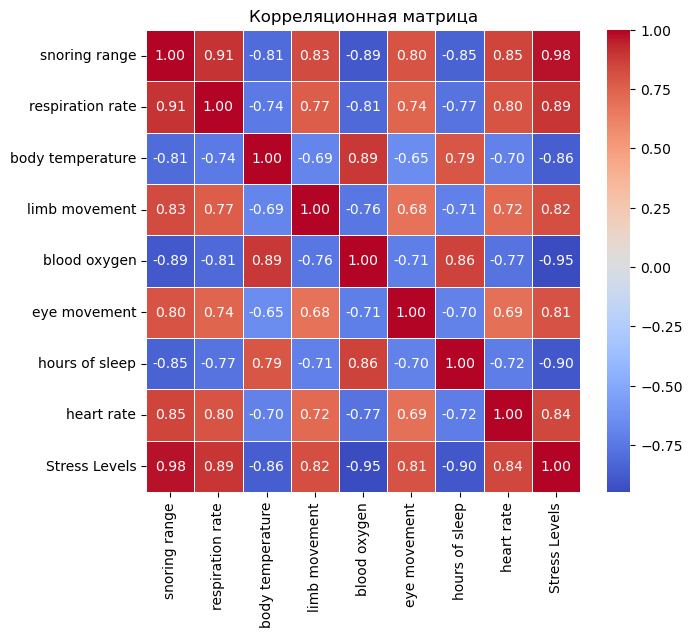

In [36]:
#8 Корреляция
correlation_matrix = df.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

# Вывод по корреляции
1)Часы сна (hours of sleep)  -0.90 (очень сильная отрицательная корреляция)
Чем больше стресс, тем меньше человек спит

2)Насыщение кислородом в крови (blood oxygen) -0.95 (очень сильная отрицательная корреляция)
Чем выше стресс, тем ниже уровень кислорода. Это может указывать на ухудшение дыхания во время стресса

3)Движение глаз (eye movement)  0.81 (значительная положительная связь)
Возможно, это связано с нарушениями сна или более активной фазой REM из-за стресса

4)Частота сердечных сокращений (heart rate) 0.84 (сильная положительная корреляция)
Учащённое сердцебиение один из биологических маркеров стресса

5)Движение конечностей (limb movement) 0.82 (значительная положительная связь)
Люди под стрессом могут больше двигаться во сне, испытывая беспокойство

6)Частота дыхания (respiration rate) 0.89 (сильная положительная корреляция)
Высокая частота дыхания связана со стрессом. Это ожидаемо, так как стресс обычно ускоряет дыхание

7)Храп (snoring range) 0.98 (очень сильная положительная корреляция)
Чем сильнее храп, тем выше уровень стресса. Возможно, стресс влияет на дыхательные пути во время сна

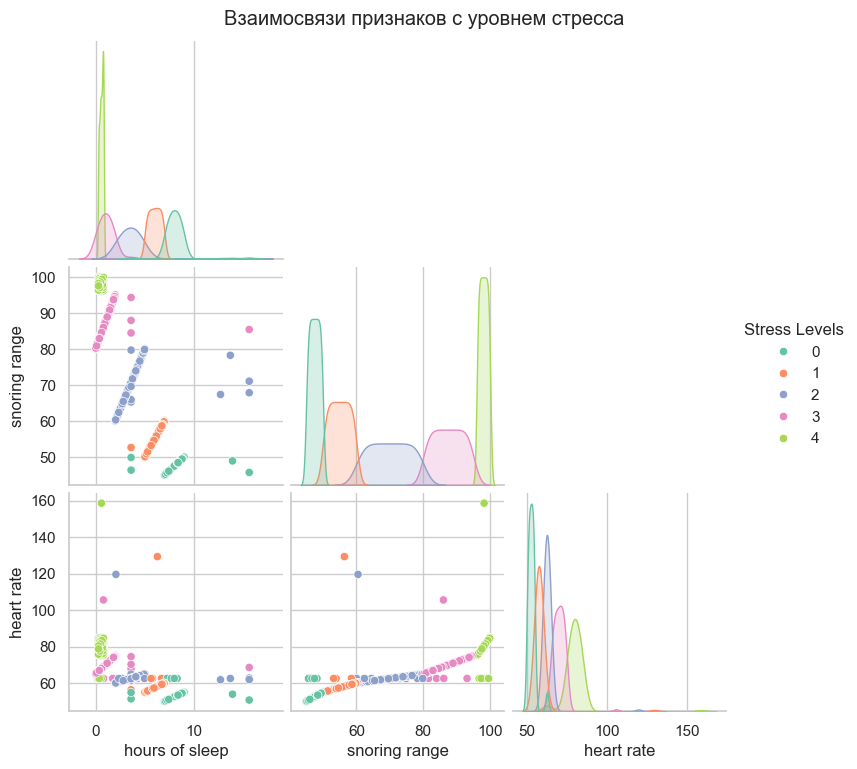

<Figure size 2000x1000 with 0 Axes>

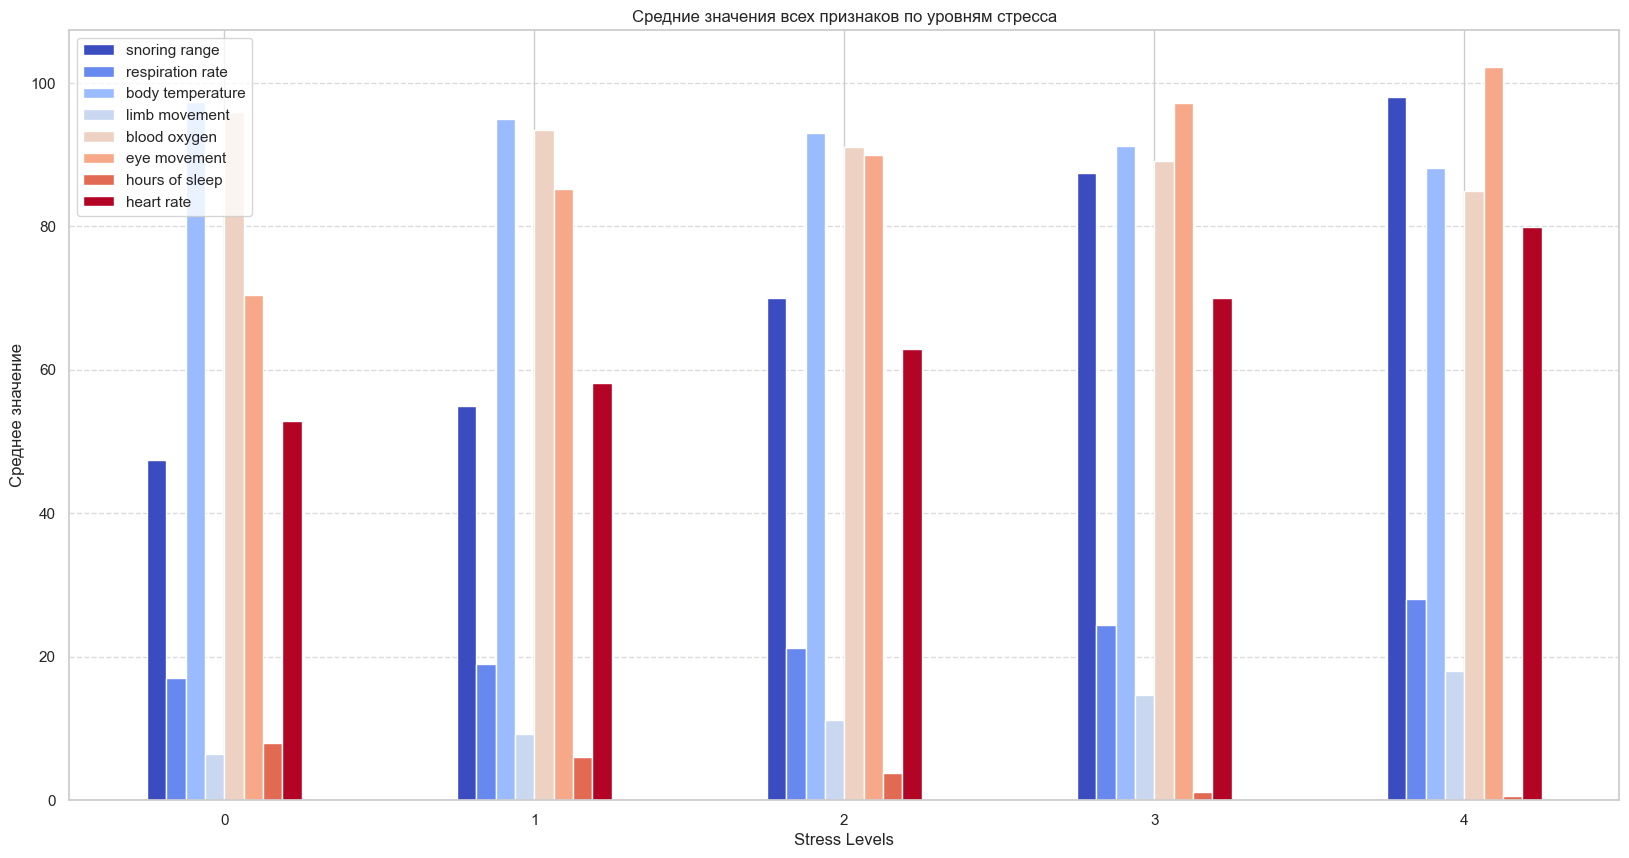

In [38]:
#9 Визуализация

sns.set(style="whitegrid")

# 1. Взаимосвязи признаков со стрессом (pairplot)
sns.pairplot(df, 
             vars=['hours of sleep', 'snoring range', 'heart rate'], 
             hue='Stress Levels', 
             palette='Set2', 
             diag_kind='kde',
            corner=True)
plt.suptitle('Взаимосвязи признаков с уровнем стресса', y=1.02)
plt.show()

# 2. Средние значения признаков по уровням стресса (столбчатая диаграмма)
stress_grouped = df.groupby('Stress Levels').mean()

plt.figure(figsize=(20, 10))
stress_grouped.plot(kind='bar', figsize=(20, 10), colormap='coolwarm')
plt.title('Средние значения всех признаков по уровням стресса')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='best')
plt.show()

# Выводы исходя из графиков:
Что показывает pairplot:
У 4 уровня стресса (зеленый) часы сна значительно уменьшились.
Чем выше стресс, тем ниже количество сна (четкая обратная зависимость).
Пульс (heart rate) и храп (snoring range) растут с увеличением уровня стресса.
График подтверждает гипотезу о том, что высокий стресс связан с ухудшением сна и повышенной активностью сердечно-сосудистой системы.

Что показывает диаграмма:
Сон (hours of sleep) резко падает при высоком стрессе.
Например, при Stress Level = 0 среднее 8 часов, а при Stress Level = 4 — менее 1 часа.
Частота дыхания (respiration rate), движение глаз (eye movement) и пульс (heart rate) увеличиваются.
Это соответствует физиологическим реакциям организма на стресс.
Кислород в крови (blood oxygen) падает, что может указывать на ухудшение сна.
Температура тела (body temperature) показывает слабую зависимость от стресса.

In [ ]:
#10 Выводы

Основные наблюдения по данным:
Высокий уровень стресса (Stress Level = 4) = бессонница (0.5 - 0.8 часа сна).
Храп (snoring range) почти линейно растет при увеличении стресса.
Пульс (heart rate) растет вместе со стрессом, подтверждая влияние тревожности на сердечно-сосудистую систему.
Выраженные корреляции подтверждают, что:
при понижении hours of sleep, следовательно Stress Levels повышается (недостаток сна повышает стресс).
при повышении snoring range, следовательно Stress Levels повышается (стресс усиливает храп).
при усилении heart rate, следовательно Stress Levels повыщается (повышенный пульс при стрессе).


Возможные гипотезы для дальнейшего исследования:
1. Гипотеза о влиянии качества сна на уровень стресса:
Недостаток сна и его низкое качество (частые движения, эпизоды храпа) могут выступать не только следствием, но и причиной роста уровня стресса.
2. Гипотеза о предсказательной силе физиологических параметров:
Физиологические показатели (пульс, дыхание, храп, насыщение кислородом) могут быть использованы для построения модели предсказания уровня стресса, 
что может быть полезно для систем мониторинга здоровья.
3. Гипотеза о наличии подгрупп (кластеров) людей с разной реакцией на стресс:
Возможно, существует несколько типов реакций на стресс — у одних резко растет пульс, у других проявляется сильный храп или скачки температуры. 
Это можно проверить кластерным анализом.